Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)

In [3]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit the scaler to your data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train the Suppport Vector Machines model

Calculate the accuracy of the model


Training Accuracy score: 0.8177509694097371
Testing Accuracy score: 0.8364888123924269
classification_report 
               precision    recall  f1-score   support

         0.0       0.91      0.64      0.75       227
         1.0       0.81      0.96      0.88       354

    accuracy                           0.84       581
   macro avg       0.86      0.80      0.82       581
weighted avg       0.85      0.84      0.83       581



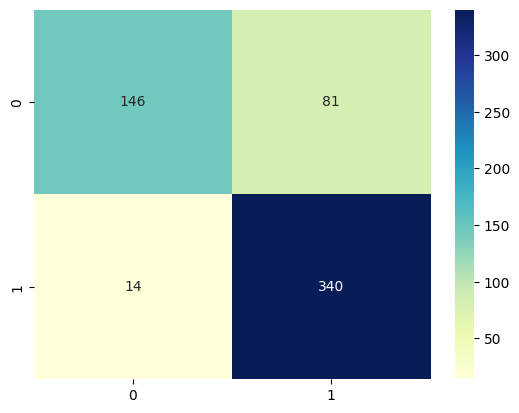

In [4]:
svc =  SVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
